In [2]:
import pandas as pd
import seaborn as sns
import plotnine as p9
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import sqlite3

In [186]:
# connect to db
#con = sqlite3.connect('FPA_FOD_20170508.sqlite')
#cursorObj = con.cursor()
#cursorObj.execute("SELECT FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,State FROM Fires where STATE='CA' LIMIT 10 ")
#cursorObj.execute('PRAGMA table_info(Fires)')
#cursorObj.fetchall()


In [20]:
#convert to csv
#db_df = pd.read_sql_query("SELECT FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,State FROM Fires where STATE='CA' ", con)
#db_df.to_csv('Fire_db.csv', index=False)



**Variables**: 

**FPA_ID** = Unique identifier that contains information necessary to track back to the original record in the source dataset.

**FIRE_CODE** = Code used within the interagency wildland fire community to track and compile cost information for emergency fire.

**FIRE_NAME** = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).

**FIRE_YEAR** = Calendar year in which the fire was discovered or confirmed to exist.

**DISCOVERY_DATE** = Date on which the fire was discovered or confirmed to exist.

**DISCOVERY_TIME** = Time of day that the fire was discovered or confirmed to exist.

**STAT_CAUSE_CODE**	= Code for the (statistical) cause of the fire.

**STAT_CAUSE_DESCR** = Description of the (statistical) cause of the fire.

**CONT_DATE**=  Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).

**FIRE_SIZE** =Estimate of acres within the final perimeter of the fire.

**FIRE_SIZE_CLASS**= Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

**LATITUDE** =Latitude (NAD83) for point location of the fire (decimal degrees).

**LONGITUDE** =Longitude (NAD83) for point location of the fire (decimal degrees).

**FIPS_CODE** =Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.

**FIPS_NAME** =County name from the FIPS publication 6-4 for representation of counties and equivalent entities.

**State** = Two-letter code for the state in which the unit is located (or primarily affiliated).

In [3]:
#load dataset
firedb=pd.read_csv('Fire_db.csv')

#drop all na values
df_CA=firedb.dropna()
df_CA

/Users/chang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,8,14) have mixed types.Specify dtype option on import or set low_memory=False.


,FPA_ID,FIRE_CODE,FIRE_NAME,FIRE_YEAR,date(DISCOVERY_DATE),DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,date(CONT_DATE),FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,FIPS_CODE,FIPS_NAME,STATE
0,FS-1418826,BJ8K,FOUNTAIN,2005,2005-02-02,1300.0,9.0,Miscellaneous,2005-02-02,0.10,A,40.036944,-121.005833,63.0,Plumas,CA
1,FS-1418827,AAC0,PIGEON,2004,2004-05-12,845.0,1.0,Lightning,2004-05-12,0.25,A,38.933056,-120.404444,61.0,Placer,CA
2,FS-1418835,A32W,SLACK,2004,2004-05-31,1921.0,5.0,Debris Burning,2004-05-31,0.10,A,38.984167,-120.735556,17.0,El Dorado,CA
17,FS-1418881,BHA3,FREDS,2004,2004-10-13,1618.0,2.0,Equipment Use,2004-10-17,7700.00,G,38.780000,-120.260000,17.0,El Dorado,CA
23,FS-1419089,BEZ8,HOT SPRINGS,2005,2005-05-06,1145.0,5.0,Debris Burning,2005-05-09,0.10,A,38.700278,-119.840556,3.0,Alpine,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177324,FWS-2015USCASWRJ42X,J42X,POOL 11,2015,2015-10-23,1000.0,5.0,Debris Burning,2015-10-23,0.50,B,39.371051,-122.139002,11.0,Colusa,CA
177325,FWS-2015USCASJRJ31F,J31F,ALFALFA,2015,2015-09-24,900.0,13.0,Missing/Undefined,2015-09-24,0.10,A,37.193556,-120.841750,47.0,Merced,CA
177326,FWS-2015USCALURJH8F,JH8F,PARKING LOT 3,2015,2015-02-06,1300.0,9.0,Miscellaneous,2015-02-06,0.10,A,37.192558,-120.824639,47.0,Merced,CA
177329,FWS-2015USCAMDRJ3UT,J3UT,REFUGE,2015,2015-09-10,1700.0,9.0,Miscellaneous,2015-09-10,0.20,A,41.461000,-120.506434,49.0,Modoc,CA


In [178]:
#correlation plot (only for cts variables)
corr = df_CA.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,FIRE_YEAR,DISCOVERY_TIME,STAT_CAUSE_CODE,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE
FIRE_YEAR,1.000000,-0.010946,-0.154810,0.024395,0.076578,-0.015017,0.089882
DISCOVERY_TIME,-0.010946,1.000000,-0.024263,0.003008,0.039512,-0.024595,0.007852
STAT_CAUSE_CODE,-0.154810,-0.024263,1.000000,-0.010788,-0.233983,0.136786,-0.048494
FIRE_SIZE,0.024395,0.003008,-0.010788,1.000000,0.004909,-0.014337,0.016136
LATITUDE,0.076578,0.039512,-0.233983,0.004909,1.000000,-0.894356,0.045622
LONGITUDE,-0.015017,-0.024595,0.136786,-0.014337,-0.894356,1.000000,-0.065873
FIPS_CODE,0.089882,0.007852,-0.048494,0.016136,0.045622,-0.065873,1.000000


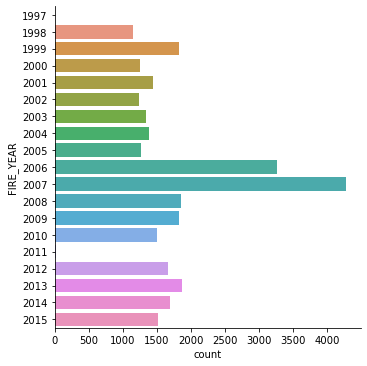

In [95]:
#bar chart of fire year
sns.catplot(y="FIRE_YEAR", kind="count",  data=df_CA)

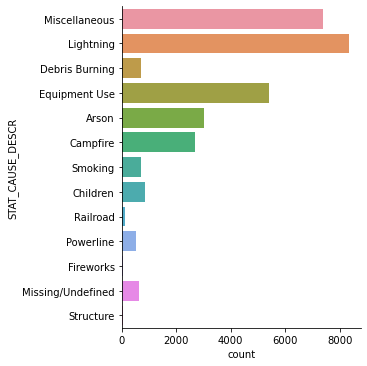

In [94]:
#bar chart of fire cause descr
sns.catplot(y="STAT_CAUSE_DESCR", kind="count",  data=df_CA)

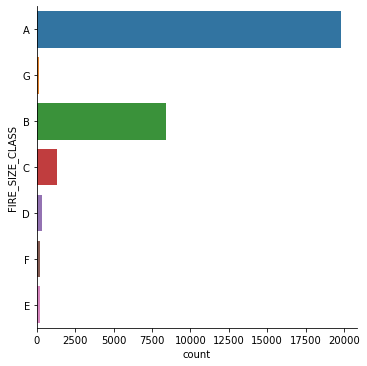

In [96]:
#bar chart of fire size 
sns.catplot(y="FIRE_SIZE_CLASS", kind="count",  data=df_CA)


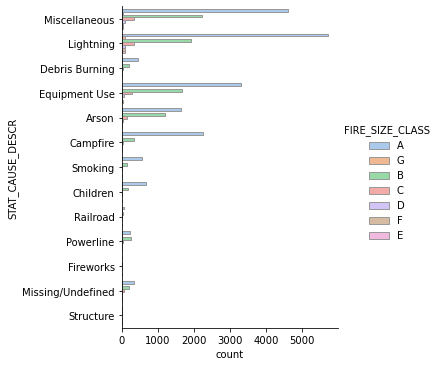

In [98]:
#bar chart of fire size class and STAT_CAUSE_DESCR
sns.catplot(y="STAT_CAUSE_DESCR", hue="FIRE_SIZE_CLASS", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_CA)

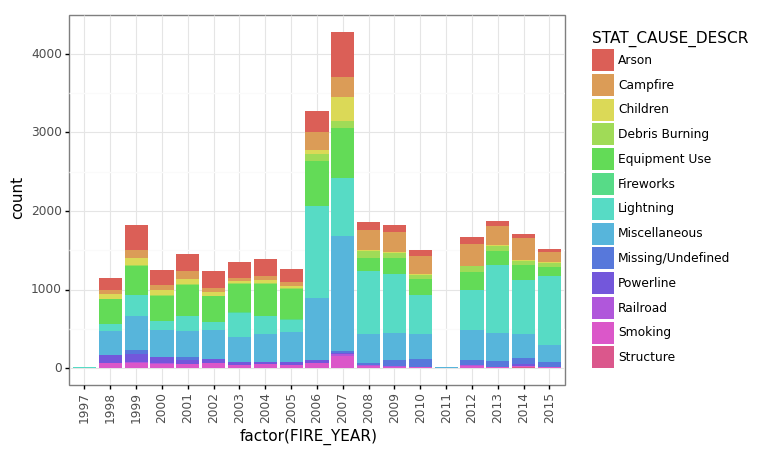

<ggplot: (8770654033065)>

In [104]:
#histgram of STAT_CAUSE_DESCR and fire year

(p9.ggplot(data=df_CA,
           mapping=p9.aes(x='factor(FIRE_YEAR)',fill = 'STAT_CAUSE_DESCR'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)


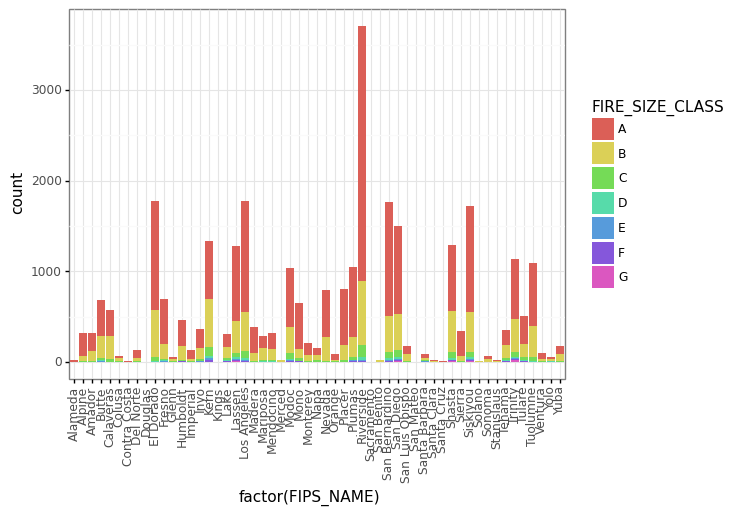

<ggplot: (8770654985204)>

In [107]:
#histgram of fire size class and fips name

(p9.ggplot(data=df_CA,
           mapping=p9.aes(x='factor(FIPS_NAME)',fill = 'FIRE_SIZE_CLASS'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)
